# Bird Flu Outbreaks in the United States

In [2]:
import pandas as pd
import numpy as np
import requests
import json
import hvplot.pandas
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [3]:
#load CSV file for US bird flu
bird_flu_pd = pd.read_csv("Project 1/Resources/commercial-backyard-flocks.csv")
bird_flu_pd

,County,State,Outbreak Date,Flock Type,Flock Size
0,Riverside,California,12-31-2024,Commercial Table Egg Layer,181300
1,Ottawa,Michigan,12-31-2024,Commercial Turkey Meat Bird,23600
2,Ottawa,Michigan,12-31-2024,Commercial Turkey Meat Bird,29600
3,Butte,California,12-31-2024,WOAH Non-Poultry,70
4,Miner,South Dakota,12-31-2024,WOAH Poultry,1500
...,...,...,...,...,...
1477,Canyon,Idaho,01-03-2025,WOAH Non-Poultry,20
1478,Sonoma,California,01-03-2024,Commercial Broiler Production,77900
1479,Merced,California,01-03-2024,Commercial Broiler Production,534800
1480,Merced,California,01-03-2024,Commercial Table Egg Layer,764300


### National Egg Layer Outbreak Data

In [4]:
# Filter for National bird flu 'Table Egg Layer' outbreaks
egg_layers = bird_flu_pd.loc[bird_flu_pd["Flock Type"].isin(["Commercial Table Egg Layer"])]

egg_layers

,County,State,Outbreak Date,Flock Type,Flock Size
0,Riverside,California,12-31-2024,Commercial Table Egg Layer,181300
18,Sonoma,California,12-28-2023,Commercial Table Egg Layer,52400
19,Sonoma,California,12-28-2023,Commercial Table Egg Layer,37300
27,Darke,Ohio,12-27-2024,Commercial Table Egg Layer,931300
42,Merced,California,12-26-2023,Commercial Table Egg Layer,709000
...,...,...,...,...,...
1422,Newton,Missouri,01-14-2025,Commercial Table Egg Layer,1585100
1448,Darke,Ohio,01-08-2025,Commercial Table Egg Layer,245300
1455,Hyde,North Carolina,01-07-2025,Commercial Table Egg Layer,3314900
1480,Merced,California,01-03-2024,Commercial Table Egg Layer,764300


In [23]:
#Combine Flock Size data for same date values into a dataframe for graphing
result = {}

for index, row in egg_layers.iterrows():
#    state = row['State']
    date = row['Outbreak Date']
    value = row['Flock Size']

    if date in result:
        result[date] += value
    else:
        result[date] = value

combined_egg_layers = pd.DataFrame(result.items(), columns=['Outbreak Date', 'Total Flock Size'])
combined_egg_layers

,Outbreak Date,Total Flock Size
0,12-31-2024,181300
1,12-28-2023,89700
2,12-27-2024,931300
3,12-26-2023,709000
4,12-24-2024,2125400
...,...,...
68,01-14-2025,1585100
69,01-08-2025,245300
70,01-07-2025,3314900
71,01-03-2024,764300


In [5]:
#Set Flock size to numeric values
combined_egg_layers['Total Flock Size'] = pd.to_numeric(combined_egg_layers['Total Flock Size'])
combined_egg_layers

,Outbreak Date,Total Flock Size
0,12-31-2024,181300
1,12-28-2023,89700
2,12-27-2024,931300
3,12-26-2023,709000
4,12-24-2024,2125400
...,...,...
68,01-14-2025,1585100
69,01-08-2025,245300
70,01-07-2025,3314900
71,01-03-2024,764300


In [7]:
#Set index to Outbreak Date and sort by ascending
combined_egg_layers['Outbreak Date'] = pd.to_datetime(combined_egg_layers['Outbreak Date'])
combined_egg_layers.set_index(['Outbreak Date'], inplace=True)
combined_egg_layers.sort_index(inplace=True)
combined_egg_layers

,Total Flock Size
Outbreak Date,
2022-02-22,1046900
2022-03-04,644000
2022-03-10,1579300
2022-03-14,2750700
2022-03-17,5347500
...,...
2025-01-21,1175800
2025-01-23,1553900
2025-01-24,3301300


In [8]:
min_flock = combined_egg_layers['Total Flock Size'].min()
print(min_flock)
max_flock = combined_egg_layers['Total Flock Size'].max()
print(max_flock)

72300
5347500


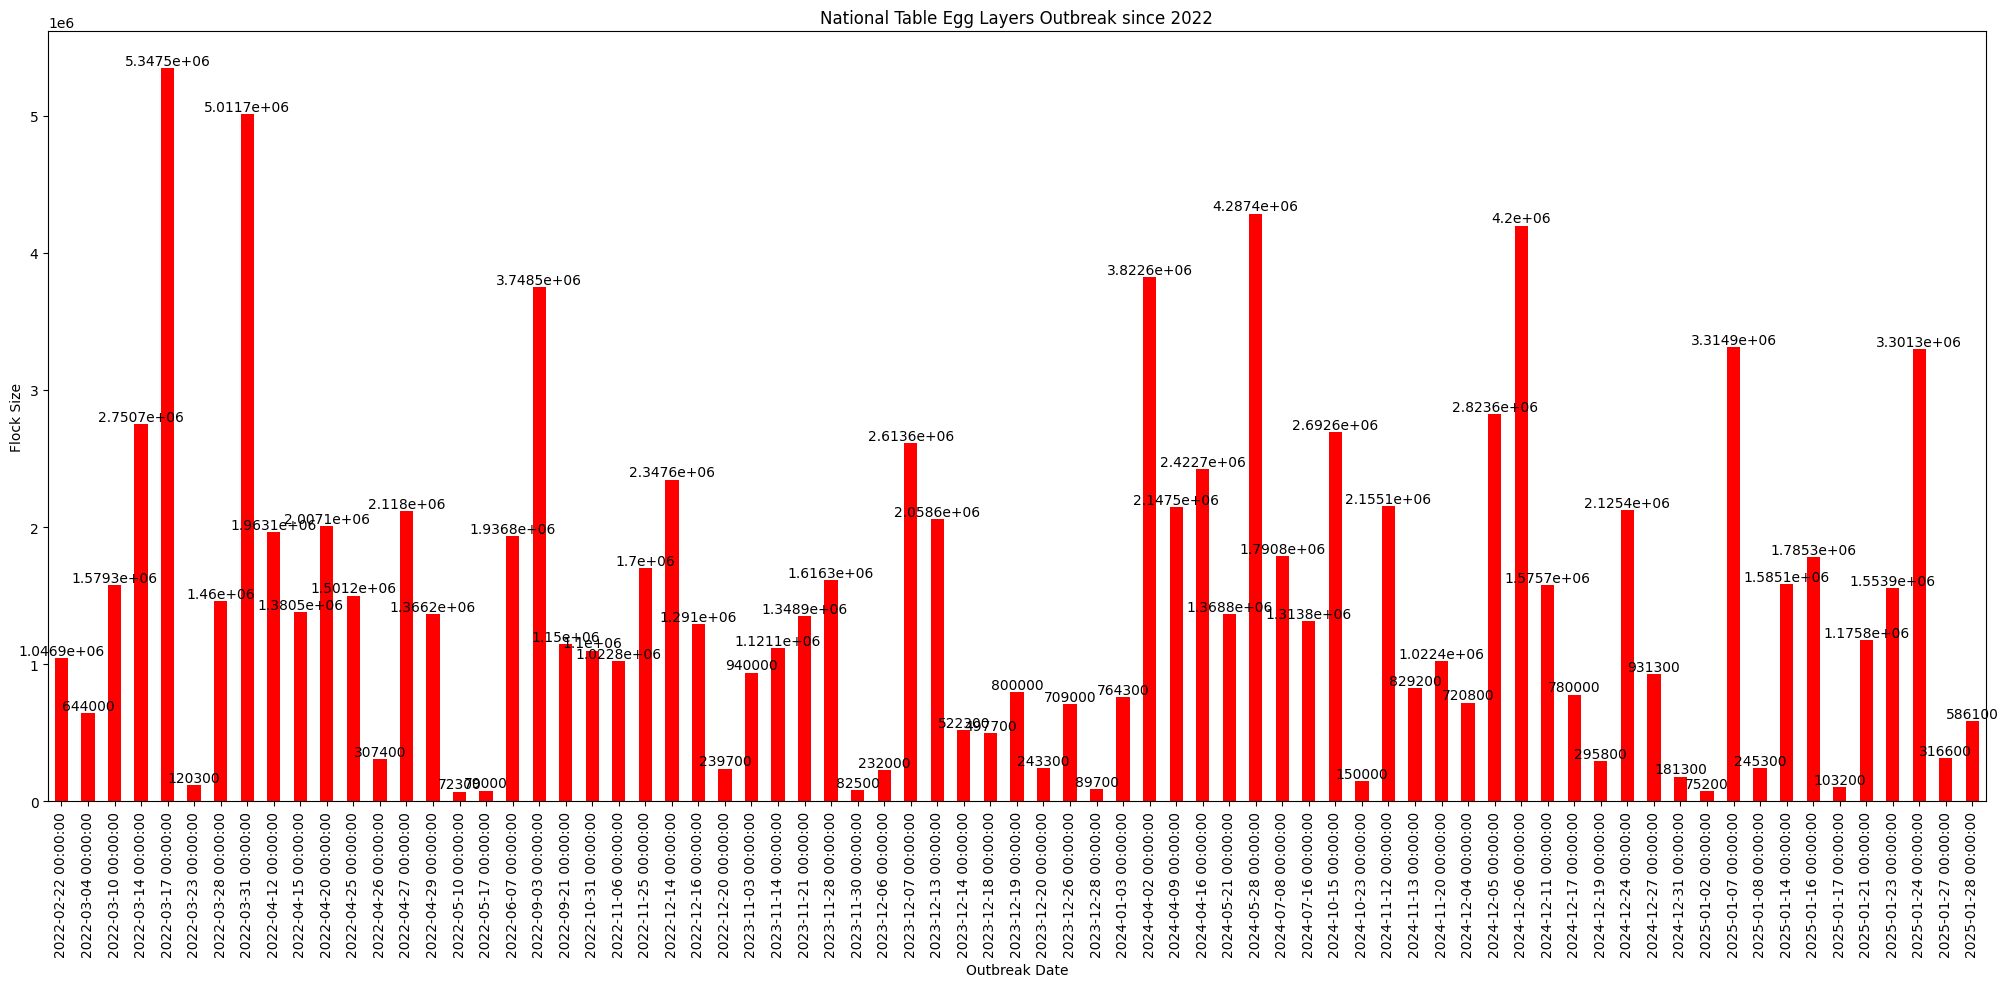

In [14]:
#Graph National Table Egg Layer data
figure1 = combined_egg_layers['Total Flock Size'].plot(kind="bar", color="red", figsize=(25, 10),
                                    title="National Table Egg Layers Outbreak since 2022",
                                    xlabel="Outbreak Date",
                                    ylabel="Flock Size")
plt.xticks(ha='center', rotation=90)
plt.bar_label(figure1.containers[0])
plt.show()

## Sort Egg Layer Outbreaks by Region

### Midwest Region

In [15]:
#Filter Table Egg Layers by Midwest states
midwest_pd = egg_layers.loc[egg_layers["State"].isin(["Minnesota", "Iowa", "Wisconsin", "South Dakota", "North Dakota", "Michigan", "Illinois", "Kansas", "Indiana", "Missouri", "Nebraska", "Ohio"])]
midwest_pd

,County,State,Outbreak Date,Flock Type,Flock Size
27,Darke,Ohio,12-27-2024,Commercial Table Egg Layer,931300
89,Rice,Kansas,12-19-2023,Commercial Table Egg Layer,800000
103,O'brien,Iowa,12-17-2024,Commercial Table Egg Layer,351400
105,Sioux,Iowa,12-17-2024,Commercial Table Egg Layer,428600
129,Darke,Ohio,12-14-2023,Commercial Table Egg Layer,522300
133,Moody,South Dakota,12-14-2022,Commercial Table Egg Layer,1332100
139,Rice,Kansas,12-13-2023,Commercial Table Egg Layer,700000
162,Sioux,Iowa,12-11-2024,Commercial Table Egg Layer,1575700
201,Hardin,Ohio,12-07-2023,Commercial Table Egg Layer,2613600
208,Sioux,Iowa,12-06-2024,Commercial Table Egg Layer,4200000


In [31]:
#Combine Flock Size data for same date values into a dataframe for graphing
mw_result = {}

for index, row in midwest_pd.iterrows():
    date = row['Outbreak Date']
    value = row['Flock Size']

    if date in mw_result:
        mw_result[date] += value
    else:
        mw_result[date] = value

mw_combined_egg_layers = pd.DataFrame(mw_result.items(), columns=['Outbreak Date', 'Total Flock Size'])
mw_combined_egg_layers

,Outbreak Date,Total Flock Size
0,12-27-2024,931300
1,12-19-2023,800000
2,12-17-2024,780000
3,12-14-2023,522300
4,12-14-2022,1332100
5,12-13-2023,700000
6,12-11-2024,1575700
7,12-07-2023,2613600
8,12-06-2024,4200000
9,11-28-2023,1616300


In [32]:
#Set Flock size to numeric values
mw_combined_egg_layers['Total Flock Size'] = pd.to_numeric(mw_combined_egg_layers['Total Flock Size'])

In [33]:
#Set Outbreak Date to index and sort by ascending dates
mw_combined_egg_layers['Outbreak Date'] = pd.to_datetime(mw_combined_egg_layers['Outbreak Date'])
mw_combined_egg_layers.set_index(['Outbreak Date'], inplace=True)
mw_combined_egg_layers.sort_index(inplace=True)
mw_combined_egg_layers

,Total Flock Size
Outbreak Date,
2022-03-10,915900
2022-03-14,2750700
2022-03-17,5347500
2022-03-23,120300
2022-03-28,1460000
2022-03-31,5011700
2022-04-12,1963100
2022-04-27,2118000
2022-09-03,3748500


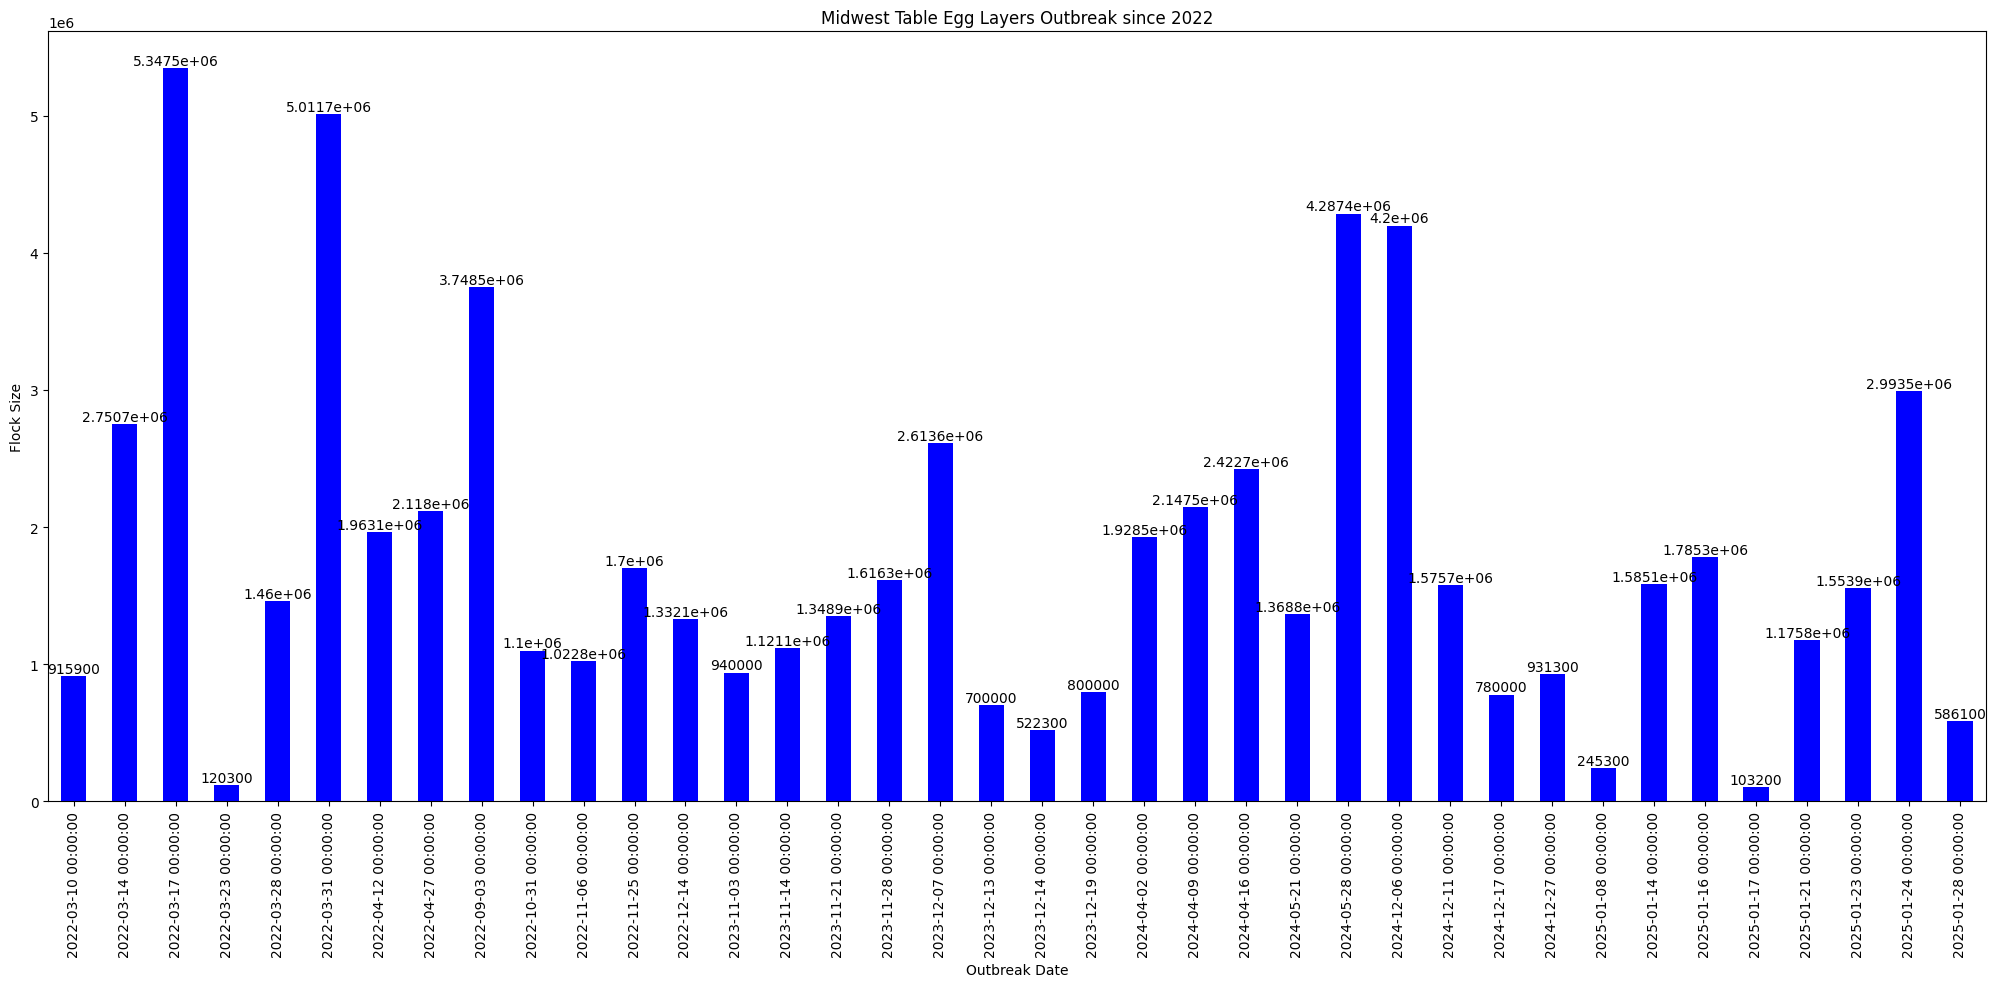

In [34]:
#Graph Midwest Table Egg Layer data
figure2 = mw_combined_egg_layers['Total Flock Size'].plot(kind="bar", color="blue", figsize=(25, 10),
                                    title="Midwest Table Egg Layers Outbreak since 2022",
                                    xlabel="Outbreak Date",
                                    ylabel="Flock Size")
plt.xticks(ha='center', rotation=90)
plt.bar_label(figure2.containers[0])
plt.show()

### Northeast Region

In [7]:
#Filter out Northeast states from Egg Layer data
ne_df = egg_layers.loc[egg_layers["State"].isin(["Massachusetts", "Rhode Island", 
                                                 "Connecticut", "Vermont", "New Hampshire", 
                                                 "Maine", "Pennsylvania", "New Jersey", "New York"])]
ne_df

,County,State,Outbreak Date,Flock Type,Flock Size
857,Berks,Pennsylvania,05-17-2022,Commercial Table Egg Layer,79000
886,Lancaster,Pennsylvania,05-10-2022,Commercial Table Egg Layer,72300
951,Lancaster,Pennsylvania,04-26-2022,Commercial Table Egg Layer,307400
976,Lancaster,Pennsylvania,04-20-2022,Commercial Table Egg Layer,879400
978,Lancaster,Pennsylvania,04-20-2022,Commercial Table Egg Layer,1127700
1005,Lancaster,Pennsylvania,04-15-2022,Commercial Table Egg Layer,1380500


In [8]:
#Combine Northeast Flock Size data for same date values into a dataframe for graphing
ne_result = {}

for index, row in ne_df.iterrows():
    date = row['Outbreak Date']
    value = row['Flock Size']

    if date in ne_result:
        ne_result[date] += value
    else:
        ne_result[date] = value

ne_combined_egg_layers = pd.DataFrame(ne_result.items(), columns=['Outbreak Date', 'Total Flock Size'])
ne_combined_egg_layers

,Outbreak Date,Total Flock Size
0,05-17-2022,79000
1,05-10-2022,72300
2,04-26-2022,307400
3,04-20-2022,2007100
4,04-15-2022,1380500


In [9]:
#Set Flock size to numeric values
ne_combined_egg_layers['Total Flock Size'] = pd.to_numeric(ne_combined_egg_layers['Total Flock Size'])

In [10]:
#Set Outbreak Date to index and sort by ascending dates
ne_combined_egg_layers['Outbreak Date'] = pd.to_datetime(ne_combined_egg_layers['Outbreak Date'])
ne_combined_egg_layers.set_index(['Outbreak Date'], inplace=True)
ne_combined_egg_layers.sort_index(inplace=True)
ne_combined_egg_layers

,Total Flock Size
Outbreak Date,
2022-04-15,1380500
2022-04-20,2007100
2022-04-26,307400
2022-05-10,72300
2022-05-17,79000


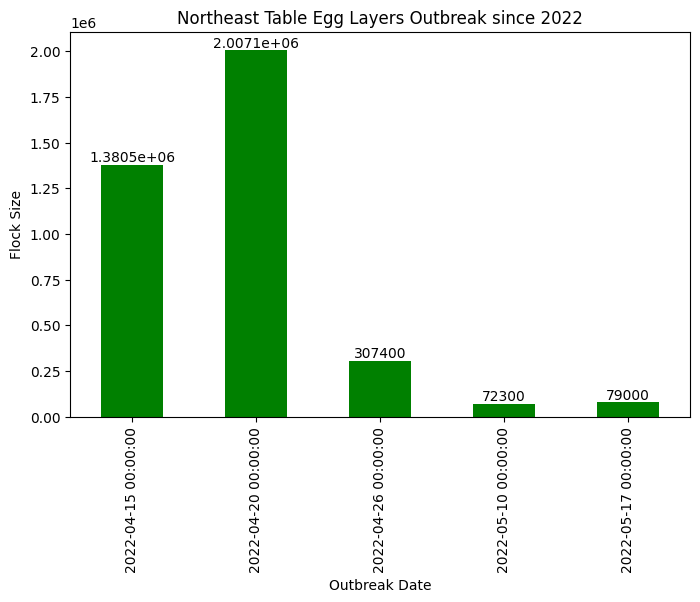

In [14]:
#Graph Northeast Outbreak data
figure3 = ne_combined_egg_layers['Total Flock Size'].plot(kind="bar", color="green", figsize=(8, 5),
                                    title="Northeast Table Egg Layers Outbreak since 2022",
                                    xlabel="Outbreak Date",
                                    ylabel="Flock Size")
plt.xticks(ha='center', rotation=90)
plt.bar_label(figure3.containers[0])
plt.show()

### Southeast Region

In [23]:
#Filter Table Egg layers by Southeast region
se_df = egg_layers.loc[egg_layers["State"].isin(["Washington DC", "Georgia", "North Carolina", "South Carolina", 
                                                 "Virginia", "West Virginia", "Kentucky", "Tennessee", "Mississippi", 
                                                 "Alabama", "Delaware", "Maryland", "Florida", "Louisiana", "Arkansas"])]
se_df

,County,State,Outbreak Date,Flock Type,Flock Size
1226,Cecil,Maryland,03-10-2022,Commercial Table Egg Layer,663400
1246,Cecil,Maryland,03-04-2022,Commercial Table Egg Layer,644000
1277,New Castle,Delaware,02-22-2022,Commercial Table Egg Layer,1046900
1455,Hyde,North Carolina,01-07-2025,Commercial Table Egg Layer,3314900


In [32]:
#Filter out Outbreak Date and Flock Size for graphing
se_egg_layers = pd.DataFrame(se_df[['Outbreak Date', 'Flock Size']])
se_egg_layers

,Outbreak Date,Flock Size
1226,03-10-2022,663400
1246,03-04-2022,644000
1277,02-22-2022,1046900
1455,01-07-2025,3314900


In [33]:
#Set Southeast data Outbreak date to index and sort by ascending date for to graph
se_egg_layers['Outbreak Date'] = pd.to_datetime(se_egg_layers['Outbreak Date'])
se_egg_layers.set_index(['Outbreak Date'], inplace=True)
se_egg_layers.sort_index(inplace=True)
se_egg_layers

,Flock Size
Outbreak Date,
2022-02-22,1046900
2022-03-04,644000
2022-03-10,663400
2025-01-07,3314900


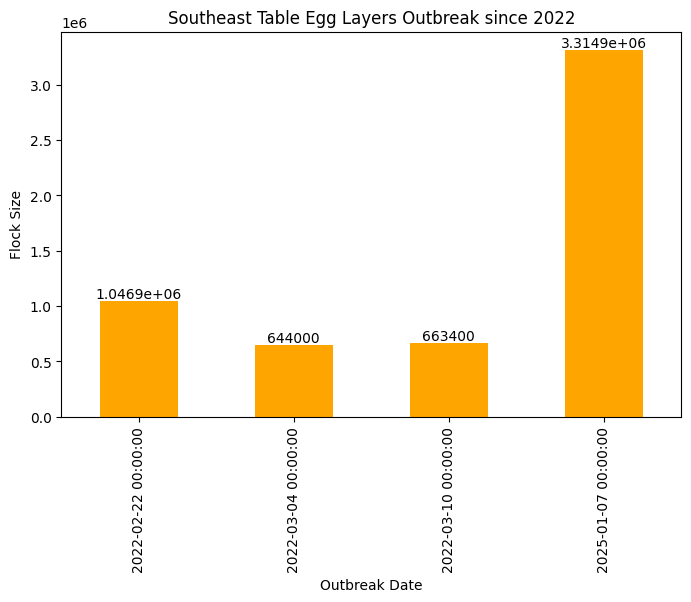

In [35]:
#Graph Southeast data
figure4 = se_egg_layers['Flock Size'].plot(kind="bar", color="orange", figsize=(8, 5),
                                    title="Southeast Table Egg Layers Outbreak since 2022",
                                    xlabel="Outbreak Date",
                                    ylabel="Flock Size")
plt.xticks(ha='center', rotation=90)
plt.bar_label(figure4.containers[0])
plt.show()

### Southwest Region

In [28]:
#Filter Table Egg layers by Southwest region
sw_df = egg_layers.loc[egg_layers["State"].isin(["Texas", "New Mexico", "Arizona", "Oklahoma"])]
sw_df

,County,State,Outbreak Date,Flock Type,Flock Size
419,Pinal,Arizona,11-13-2024,Commercial Table Egg Layer,829200
1103,Parmer,Texas,04-02-2024,Commercial Table Egg Layer,1894100
1339,Pinal,Arizona,01-27-2025,Commercial Table Egg Layer,316600


In [29]:
#Filter out Outbreak Date and Flock Size for graphing
sw_egg_layers = pd.DataFrame(sw_df[['Outbreak Date', 'Flock Size']])
sw_egg_layers

,Outbreak Date,Flock Size
419,11-13-2024,829200
1103,04-02-2024,1894100
1339,01-27-2025,316600


In [36]:
#Set Southwest data Outbreak date to index and sort by ascending date for to graph
sw_egg_layers['Outbreak Date'] = pd.to_datetime(sw_egg_layers['Outbreak Date'])
sw_egg_layers.set_index(['Outbreak Date'], inplace=True)
sw_egg_layers.sort_index(inplace=True)
sw_egg_layers

,Flock Size
Outbreak Date,
2022-02-22,1046900
2022-03-04,644000
2022-03-10,663400
2025-01-07,3314900


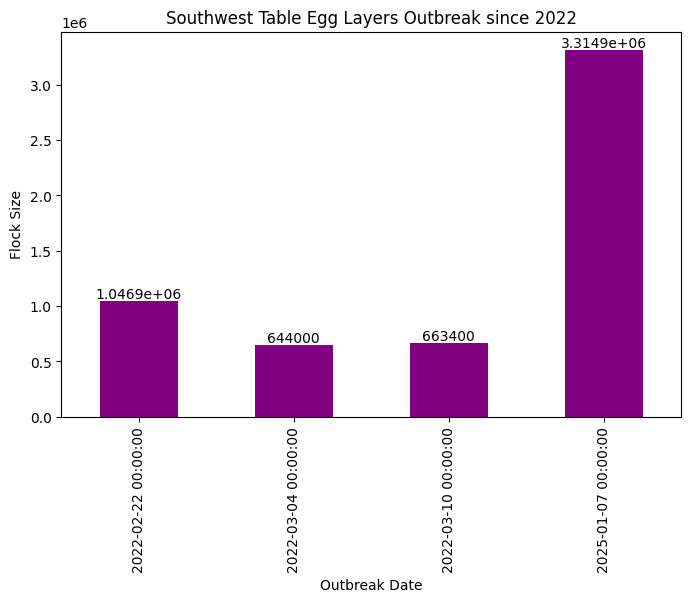

In [37]:
#Graph Southwest data
figure5 = sw_egg_layers['Flock Size'].plot(kind="bar", color="purple", figsize=(8, 5),
                                    title="Southwest Table Egg Layers Outbreak since 2022",
                                    xlabel="Outbreak Date",
                                    ylabel="Flock Size")
plt.xticks(ha='center', rotation=90)
plt.bar_label(figure5.containers[0])
plt.show()

### West Region

In [38]:
#Filter Table Egg layers by West region
west_df = egg_layers.loc[egg_layers["State"].isin(["California", "Colorado", "Nevada", 
                                                   "Hawaii", "Alaska", "Oregon", "Utah", 
                                                   "Idaho", "Montana", "Wyoming", "Washington"])]
west_df

,County,State,Outbreak Date,Flock Type,Flock Size
0,Riverside,California,12-31-2024,Commercial Table Egg Layer,181300
18,Sonoma,California,12-28-2023,Commercial Table Egg Layer,52400
19,Sonoma,California,12-28-2023,Commercial Table Egg Layer,37300
42,Merced,California,12-26-2023,Commercial Table Egg Layer,709000
43,Riverside,California,12-24-2024,Commercial Table Egg Layer,1105500
47,San Joaquin,California,12-24-2024,Commercial Table Egg Layer,627800
50,Stanislaus,California,12-24-2024,Commercial Table Egg Layer,392100
71,Merced,California,12-20-2023,Commercial Table Egg Layer,243300
74,Weld,Colorado,12-20-2022,Commercial Table Egg Layer,239700
83,Stanislaus,California,12-19-2024,Commercial Table Egg Layer,295800


In [39]:
#Combine West Flock Size data for same date values into a dataframe for graphing
west_result = {}

for index, row in west_df.iterrows():
    date = row['Outbreak Date']
    value = row['Flock Size']

    if date in west_result:
        west_result[date] += value
    else:
        west_result[date] = value

west_combined_egg_layers = pd.DataFrame(west_result.items(), columns=['Outbreak Date', 'Total Flock Size'])
west_combined_egg_layers

,Outbreak Date,Total Flock Size
0,12-31-2024,181300
1,12-28-2023,89700
2,12-26-2023,709000
3,12-24-2024,2125400
4,12-20-2023,243300
5,12-20-2022,239700
6,12-19-2024,295800
7,12-18-2023,497700
8,12-16-2022,1291000
9,12-14-2022,1015500


In [40]:
#Set West data Outbreak date to index and sort by ascending date for to graph
west_combined_egg_layers['Outbreak Date'] = pd.to_datetime(west_combined_egg_layers['Outbreak Date'])
west_combined_egg_layers.set_index(['Outbreak Date'], inplace=True)
west_combined_egg_layers.sort_index(inplace=True)
west_combined_egg_layers

,Total Flock Size
Outbreak Date,
2022-04-25,1501200
2022-04-29,1366200
2022-06-07,1936800
2022-09-21,1150000
2022-12-14,1015500
2022-12-16,1291000
2022-12-20,239700
2023-11-30,82500
2023-12-06,232000


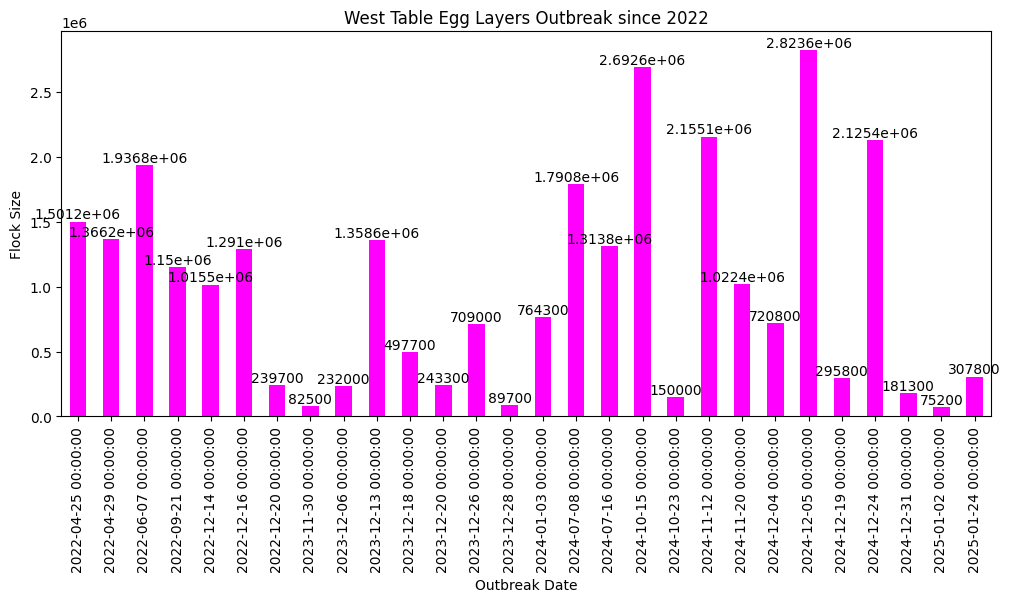

In [42]:
#Graph West Outbreak data
figure6 = west_combined_egg_layers['Total Flock Size'].plot(kind="bar", color="magenta", figsize=(12, 5),
                                    title="West Table Egg Layers Outbreak since 2022",
                                    xlabel="Outbreak Date",
                                    ylabel="Flock Size")
plt.xticks(ha='center', rotation=90)
plt.bar_label(figure6.containers[0])
plt.show()